# OOPS

creating a class and object

In [15]:
class A():
    pass
c = A()
print(c)

The first parameter of the method must be refered as self ,self point to the class.

In [16]:
class Ed():
    def fu(self):
        print("hello welcome")
d = Ed()
d.fu()

hello welcome


There are two type of class attributes present
- user defined class attributes
- in built class attributes

### In build class attributes

In [17]:
print(Ed.__dict__)
#it shows the class documentation
print(Ed.__doc__)
#This gives the class name
print("The class name is :- ",Ed.__name__)
#this gives the module name in which the class is defined
print("the module name is :- ",Ed.__module__)
#The belowe attribute tells about the base class
print("This module gives the base class names : -",Ed.__base__)

{'__module__': '__main__', 'fu': <function Ed.fu at 0x123efeef0>, '__dict__': <attribute '__dict__' of 'Ed' objects>, '__weakref__': <attribute '__weakref__' of 'Ed' objects>, '__doc__': None}
None
The class name is :-  Ed
the module name is :-  __main__
This module gives the base class names : - <class 'object'>


### user defined attributes

In [18]:
class A():
    def f():
        pass

There are some access specifier for the attributes
- public
- private
- protected

In [19]:
class f:
    def __init__(self):
        self.public = ("hello i am public")
        self._protected = ("hello i am protected")
        self.__private = ("I am private")
b = f()
print("The public variable is :- ",b.public)
print("The protected variable is :- ",b._protected)
print("Thr private variable is :- ",b.__private)

The public variable is :-  hello i am public
The protected variable is :-  hello i am protected


AttributeError: 'f' object has no attribute '__private'

Note : we can have public ,private and potected methods as wll

#### class variable and instance variableB

In [20]:
class G():
    #class variable
    name = "hello"
    def some_name(self,name1):
        #class variable
        self.name1 = name1
#instance variable
obj = G()
print(obj.name)
obj.some_name("rohan")

hello


#### cconstructure and distructure

In [21]:
class D():
    def __init__(self):
        print("constructure is init")
    def __del__(self):
        print("destructing the object")

if __name__ == "__main__":
    b = D()
    del b

constructure is init
destructing the object


### multiple constructors

In [22]:
class D():
    def __init__(self,name,roll_no,height,weight):
        self.name = name
        self.roll_no = roll_no
        self.height = height
        self.weight = weight
    @classmethod
    def r(self,roll_no,height,weight,name):
        self.name = name
        self.roll_no = roll_no
        self.height = height                         
        self.weight = weight
v = D("rohan",23,45,67)
v.roll_no

23

### inheretance
single ingeretance

In [23]:
class base():
    def fu(self):
        print("hello i am a base class")
class child(base):
    def f(self):
        print("hello i am a child class")
c = child()
c.fu()

hello i am a base class


multiple inheretance and super keyword

In [24]:
class base:
    def __init__(self,name):
        self.name = name
    pass
class ch(base):
    def __init__(self,name):
        super(). __init__(name)
obj = ch("hello")
obj.name

'hello'

# Linear regression

creating the data for linear regression

In [25]:
import numpy as np
# create dummy data for training

#creating the x_values
x_values = [i for i in range(11)]
#making the list to array
x_train = np.array(x_values, dtype=np.float32)
#reshaping the array
x_train = x_train.reshape(-1, 1)


#creating the y_values 
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [26]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [28]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [29]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

creating the linear regression classifier

In [30]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

# using the network

down below we are creating the neural network,where inputDim tells the number of input bubbles in the input layer,outputDim tells the number of output bubbles in the output layers.

In [31]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

#now the network is build.
model = linearRegression(inputDim, outputDim)

now we are passing the data into neural network.

After that, we initialize the loss (Mean Squared Error) and optimization (Stochastic Gradient Descent) functions that we’ll use in the training of this model.

In [32]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

After completing all the initializations, we can now begin to train our model. Following is the code for training the model.

In [33]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(71.2547, grad_fn=<MseLossBackward>)
epoch 0, loss 71.25465393066406
tensor(5.8120, grad_fn=<MseLossBackward>)
epoch 1, loss 5.812027454376221
tensor(0.4741, grad_fn=<MseLossBackward>)
epoch 2, loss 0.47407886385917664
tensor(0.0387, grad_fn=<MseLossBackward>)
epoch 3, loss 0.038679301738739014
tensor(0.0032, grad_fn=<MseLossBackward>)
epoch 4, loss 0.003164922120049596
tensor(0.0003, grad_fn=<MseLossBackward>)
epoch 5, loss 0.00026798731414601207
tensor(3.1604e-05, grad_fn=<MseLossBackward>)
epoch 6, loss 3.16039877361618e-05
tensor(1.2216e-05, grad_fn=<MseLossBackward>)
epoch 7, loss 1.221599814016372e-05
tensor(1.0526e-05, grad_fn=<MseLossBackward>)
epoch 8, loss 1.052606512530474e-05
tensor(1.0283e-05, grad_fn=<MseLossBackward>)
epoch 9, loss 1.0282961738994345e-05
tensor(1.0157e-05, grad_fn=<MseLossBackward>)
epoch 10, loss 1.0157100405194797e-05
tensor(1.0043e-05, grad_fn=<MseLossBackward>)
epoch 11, loss 1.0042811481980607e-05
tensor(9.9299e-06, grad_fn=<MseLossBackward>)


Now that our Linear Regression Model is trained, let’s test it. Since it’s a very trivial model, we’ll test this on our existing dataset and also plot to see the original vs the predicted outputs.

[[ 0.99640334]
 [ 2.9969215 ]
 [ 4.9974394 ]
 [ 6.9979577 ]
 [ 8.998476  ]
 [10.998994  ]
 [12.999513  ]
 [15.0000305 ]
 [17.000547  ]
 [19.001066  ]
 [21.001583  ]]


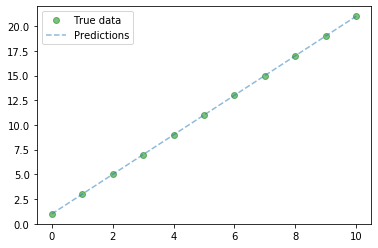

In [34]:
from matplotlib import pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [35]:
import torch

In [36]:
torch.tensor(1)

tensor(1)

In [37]:
torch.tensor([12,3])

tensor([12,  3])

In [38]:
x=torch.tensor([[1,2,3],[4,56,6]])
y=torch.tensor([[78,89,45],[90,89,54]])

# Appling ANN on the vector data

note :- If we have the regression problem ,then we should not apply activation function,if its a classification problem ,then we apply activation function

# data preperation and preprocessing

In [39]:
import numpy as np
# create dummy data for training

#creating the x_values
x_values = [i for i in range(11)]
#making the list to array
x_train = np.array(x_values, dtype=np.float32)
#reshaping the array
x_train = x_train.reshape(-1, 1)


#creating the y_values 
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [40]:
x_train
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [41]:
torch.__version__

'1.3.1'

In [42]:
#defining the neural network frame work.
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.layer1 = torch.nn.Linear(inputSize, outputSize)
        self.layer2 = torch.nn.Linear(outputSize,outputSize)
    def forward(self, x):
        layer1_output = self.layer1(x)
        layer2_output = self.layer2(layer1_output)
        return layer2_output
        #return layer1_output

In [43]:
#initilizing the neural network
brain = linearRegression(1,1)
print(brain)

linearRegression(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
  (layer2): Linear(in_features=1, out_features=1, bias=True)
)


In [44]:
#few parameter for the running the model.
learning_rate = 0.01
epoch = 100

Step 3) Optimizer and Loss
Next, you should define the Optimizer and the Loss Function for our training process.

In [45]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(brain.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

Step 4) Training

Now let's start our training process. With an epoch of 250, you will iterate our data to find the best value for our hyperparameters.

In [46]:
x=Variable(torch.from_numpy(x_train),requires_grad=True)
y=Variable(torch.from_numpy(y_train),requires_grad=True)

In [47]:
for i in range(epoch):
    prediction = brain(x)
    optimizer.zero_grad()
    loss = loss_func(prediction,y)
    loss.backward()        
    optimizer.step()
    print('epoch {}, loss {} '.format(i, loss.item()))

epoch 0, loss 191.08831787109375 
epoch 1, loss 164.63526916503906 
epoch 2, loss 143.23992919921875 
epoch 3, loss 100.6243667602539 
epoch 4, loss 5.407934665679932 
epoch 5, loss 13.742831230163574 
epoch 6, loss 49.32242202758789 
epoch 7, loss 21.271541595458984 
epoch 8, loss 72.41836547851562 
epoch 9, loss 3.354529619216919 
epoch 10, loss 11.646188735961914 
epoch 11, loss 23.058122634887695 
epoch 12, loss 76.505859375 
epoch 13, loss 1.1328445672988892 
epoch 14, loss 3.462801218032837 
epoch 15, loss 8.815278053283691 
epoch 16, loss 30.903596878051758 
epoch 17, loss 28.78058433532715 
epoch 18, loss 89.86408233642578 
epoch 19, loss 2.5055577754974365 
epoch 20, loss 6.2965779304504395 
epoch 21, loss 21.4255313873291 
epoch 22, loss 27.55689239501953 
epoch 23, loss 85.34708404541016 
epoch 24, loss 1.3304615020751953 
epoch 25, loss 3.230889320373535 
epoch 26, loss 10.352380752563477 
epoch 27, loss 19.28655242919922 
epoch 28, loss 62.331912994384766 
epoch 29, loss 5

In [48]:
brain(x)

tensor([[ 2.1179],
        [ 3.3038],
        [ 4.4897],
        [ 5.6756],
        [ 6.8615],
        [ 8.0474],
        [ 9.2332],
        [10.4191],
        [11.6050],
        [12.7909],
        [13.9768]], grad_fn=<AddmmBackward>)

In [49]:
pre=brain(x)
pre=pre.detach().numpy()

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y.detach().numpy(),pre))
print("The error is :- ",rms)

The error is :-  3.9173980327644693


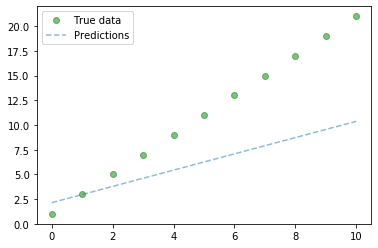

In [37]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, pre, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Predicting a new value

In [38]:
brain(Variable(torch.tensor([[float(5)]])))

tensor([[6.2523]], grad_fn=<AddmmBackward>)

# Neural network for classification

In [39]:
x_train = np.array([i for i in range(0,12)],dtype = np.float32)
y_train = np.array([0,1,0,1,0,1,0,1,0,1,0,1],dtype = np.float32)

In [40]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1,1)

# Defining the structure of the network

In [41]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        #As logistic regression use sigmoid function,so we are using sigmoid as our activation function.
        output = self.linear(x)
        output = self.relu(output)
        return output

creating the model of the above neural network structure

In [42]:
model = LogisticRegression(1,2)

In [43]:
#few parameter for the running the model.
learning_rate = 0.01
epoch = 100

For the loss function, we use Binary Cross-Entropy (BCE), which is known as the binary logarithmic loss function. This is commonly used for logistic regression tasks since we are predicting a binary value as output.

In [44]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(brain.parameters(), lr=learning_rate)
#loss_func = torch.nn.MSELoss() for regression
loss_func = torch.nn.BCELoss(size_average=True) 

/usr/local/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [45]:
len(x_train)

12

In [46]:
x=Variable(torch.from_numpy(x_train),requires_grad=True)
y=Variable(torch.from_numpy(y_train),requires_grad=False)

In [47]:
for i in range(epoch):
    model.train()
    prediction = model(x)
    optimizer.zero_grad()
    print(len(prediction))
    print(len(y))
    loss = loss_func(prediction,y)
    loss.backward()        
    optimizer.step()
    print('epoch {}, loss {} '.format(i, loss.item()))

12
12


/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([12, 1])) that is different to the input size (torch.Size([12, 2])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


ValueError: Target and input must have the same number of elements. target nelement (12) != input nelement (24)

## testing the classifier

In [48]:
model(x)

tensor([[0.9995, 0.2075],
        [0.9062, 0.2807],
        [0.8128, 0.3540],
        [0.7195, 0.4272],
        [0.6261, 0.5005],
        [0.5328, 0.5737],
        [0.4395, 0.6470],
        [0.3461, 0.7202],
        [0.2528, 0.7935],
        [0.1594, 0.8667],
        [0.0661, 0.9400],
        [0.0000, 1.0132]], grad_fn=<ReluBackward0>)

# Manually building weights and biases
One way to approach this is by building all the blocks. This is a low level approach, but it may be suited if you’re trying to reproduce the latest and greatest deep learning architecture on a paper you just just read. Or maybe if you want to develop a customized layer. Either way, PyTorch has you covered. You’ll need to define your weights and biases, but if you’re comfortable at that level, you’re good to go. The key thing here is that you will need to tell PyTorch what is variable or optimizable in your network, so that PyTorch knows how to perform gradient descent on your network. Let’s look at how someone might approach this in low level PyTorch:

In [50]:
import torch
import torch.nn.functional as F

# generating some random features
features = torch.randn(1, 16) 

# define the weights
W1 = torch.randn((16, 12), requires_grad=True)
W2 = torch.randn((12, 10), requires_grad=True)
W3 = torch.randn((10, 1), requires_grad=True)

# define the bias terms
B1 = torch.randn((12), requires_grad=True)
B2 = torch.randn((10), requires_grad=True)
B3 = torch.randn((1), requires_grad=True)

# calculate hidden and output layers
h1 = F.relu((features @ W1) + B1)
h2 = F.relu((h1 @ W2) + B2)
output = torch.sigmoid((h2 @ W3) + B3)

# 2. Extending the torch.nn.Model Class
In practice, most of us will likely use predefined layers and activation functions to train our networks. There are a couple of routes to go if you’re headed in this direction. A more elegant approach involves creating your own neural network python class, by extending the Model class from torch.nn. There are many advantages of defining a neural network this way and perhaps most notably, it allows one to inherit all of the functionality of the torch.nn module while allowing the flexibility of overwriting the default model construction and forward pass method. In this approach, we will define two methods:
1. The class constructor, __init__
2. The forward method
The first is the initializer of the class and is where you’ll define the layers that will compose the network. Typically we don’t need to define the activation functions here since they can be defined in the forward pass (i.e. in the forward method), but it’s not a rule and you can certainly do that if you want to (we’ll actually see an example at the end).
The second method is where you define the forward pass. This method takes an input that represents the features the model will be trained on. Here, you can call the activation functions and pass in as parameters the layers you’ve previously defined in the constructor method. You’ll need to pass the input as an argument to the first layer and after processing the activations, that output can be fed into the next layer and so on.
Let’s take a look at how we could do this in practice:

In [51]:
import torch
import torch.nn.functional as F
from torch import nn

# define the network class
class MyNetwork(nn.Module):
    def __init__(self):
        # call constructor from superclass
        super().__init__()
        
        # define network layers
        self.fc1 = nn.Linear(16, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10, 1)
        
    def forward(self, x):
        # define forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# instantiate the model
model = MyNetwork()

# print model architecture
print(model)

MyNetwork(
  (fc1): Linear(in_features=16, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


# 3. Using torch.nn.Sequential
There is still a more compact way to define neural networks in pytorch. This is a modular approach, made possible by the torch.nn.Sequential module and is especially appealing if you come from a Keras background, where you can define sequential layers, kind of like building something from lego blocks. This is a very similar approach to Keras’s sequential API and leverages the torch.nn pre-built layers and activation functions. Using this approach, our feed-forward network can be defined a follows:

In [52]:
from torch import nn

# define model architecture
model = nn.Sequential(
    nn.Linear(16, 12),
    nn.ReLU(),
    nn.Linear(12, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

# print model architecture
print(model)

Sequential(
  (0): Linear(in_features=16, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


## classificatio using pytorch

#### creating the dataset

In [6]:
import sklearn.datasets
X,y = sklearn.datasets.make_moons(200,noise=0.2) 

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=sklearn.cm.Spectral)

AttributeError: module 'sklearn' has no attribute 'cm'

In [8]:
X

array([[-3.13058442e-01,  1.10641925e+00],
       [-7.08581418e-02,  1.69772315e-01],
       [-7.64997815e-01,  7.88383860e-01],
       [ 1.11504116e+00, -3.27555480e-01],
       [ 2.46041384e+00,  4.50351154e-01],
       [ 8.46794340e-01, -2.15436616e-01],
       [-7.35038371e-01,  8.79679171e-01],
       [-8.61805652e-02, -1.66946993e-01],
       [ 1.01624539e+00, -6.06422487e-01],
       [ 8.86666461e-01, -6.92366549e-01],
       [ 9.90044589e-01,  1.38344594e-01],
       [ 9.08846127e-01,  7.05377758e-04],
       [ 1.56276768e-01, -1.01039877e-01],
       [-9.03625464e-01,  8.21981959e-01],
       [ 1.24091509e+00, -5.24642004e-01],
       [-2.37075800e-01,  9.42723311e-01],
       [ 4.30767357e-01,  3.77067770e-01],
       [ 8.31677130e-01,  9.74791131e-01],
       [ 8.13628618e-01,  6.34571158e-01],
       [ 3.76607281e-01, -6.22223463e-02],
       [-1.17927181e+00,  3.73646205e-01],
       [ 1.70091991e+00,  6.17004762e-02],
       [-1.00288259e+00,  6.17964701e-01],
       [ 1.

In [9]:
#from_numpy takes a numpy element and returns torch.tensor
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

NameError: name 'torch' is not defined

In [10]:
print(x)
print(y)

NameError: name 'x' is not defined

In [11]:
import torch.nn as nn
import torch.nn.functional as F
#our class must extend nn.Module
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(2,3)
        
        #This applies linear transformation to produce output data
        self.fc2 = nn.Linear(3,2)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function is Relu. Feel free to experiment with this
        x = F.tanh(x)
        #This produces output
        x = self.fc2(x)
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

The criterion that we are going to use is CrossEntropyLoss. This is the common choice for most classification problems. Let’s train the model using ADAM(Adaptive moment estimation) method.

In [12]:
#Initialize the model        
model = MyClassifier()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

NameError: name 'torch' is not defined

In [13]:
#Number of epochs
epochs = 10000
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()
    
    print("epochs",i,"loss",loss)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

I know this seems very confusing at first. All we are doing is, computing the loss. Calculating gradients and adjusting weights. implement couple of networks using PyTorch, you will get used to it for sure.
We are done with training process. Now, let’s calculate re-submission error. It’s the accuracy that we’ve been able to achieve on the training dataset. This is a bad practice, as we should always test the performance of a model on unseen data. Never the data that we have trained the model with.

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

Let’s visualize the performance of the model by visualizing the decision boundary
 This is a function which returns the class (0 or 1) , given a single input

In [61]:
def predict(x):
    #Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    #Predict and return ans
    ans = model.predict(x)
    return ans.numpy()

Below function plots the decision boundary. This is a very useful function , it gives a visual representation of how well your model is trained.

In [62]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


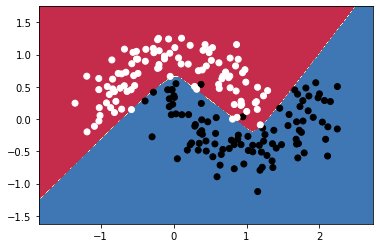

In [63]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())